In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json

In [201]:
train_path = "/content/drive/MyDrive/senior_ds_test/senior_ds_test/data/train/accounts_data_train.json"
with open(train_path, 'r') as file:
    data = json.load(file)

# Flatten the nested JSON structure
flat_data = [item for sublist in data for item in sublist]

# Convert to DataFrame
acnt_train = pd.DataFrame(flat_data)

In [5]:
# Load the JSON file
train_path = "/content/drive/MyDrive/senior_ds_test/senior_ds_test/data/train/enquiry_data_train.json"
with open(train_path, 'r') as file:
    data = json.load(file)

# Flatten the nested JSON structure
flat_data = [item for sublist in data for item in sublist]

# Convert to DataFrame
enqry_train = pd.DataFrame(flat_data)

In [103]:
Flag_train=pd.read_csv('/content/drive/MyDrive/senior_ds_test/senior_ds_test/data/train/train_flag.csv')

#ANALYSIS OF DATA

In [196]:
print(acnt_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245310 entries, 0 to 1245309
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   credit_type          1245310 non-null  object        
 1   loan_amount          1245307 non-null  float64       
 2   amount_overdue       1245310 non-null  float64       
 3   open_date            1245310 non-null  datetime64[ns]
 4   closed_date          1245310 non-null  datetime64[ns]
 5   payment_hist_string  1245310 non-null  object        
 6   uid                  1245310 non-null  object        
 7   modified_str         1245310 non-null  object        
 8   months_diff          1245310 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 85.5+ MB
None


#Using info we got to know about the NULL Values Present in each Column

#ACCOUNT PLOTS

Credit_Type PLOT

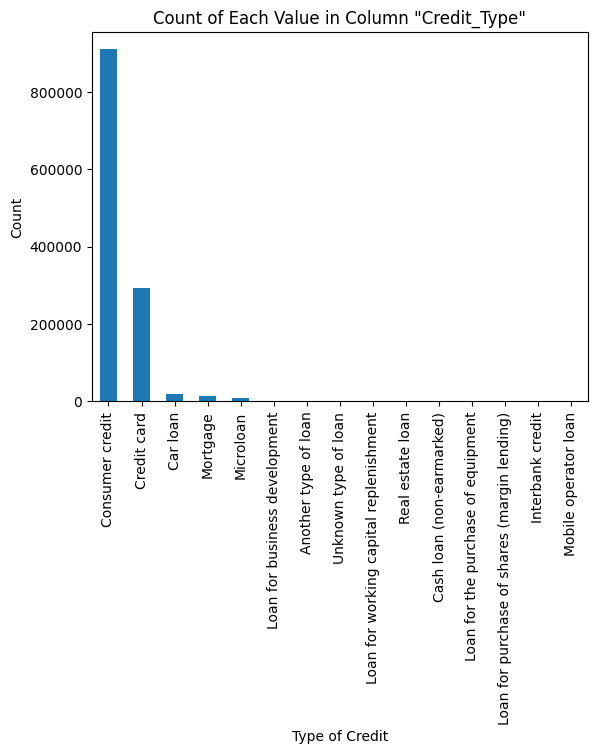

In [197]:
plt.figure()
acnt_train['credit_type'].value_counts().plot(kind='bar')
plt.xlabel('Type of Credit')
plt.ylabel('Count')
plt.title('Count of Each Value in Column "Credit_Type"')
plt.show()

#PLOT OF Number Of Defaulters For each Credit Type

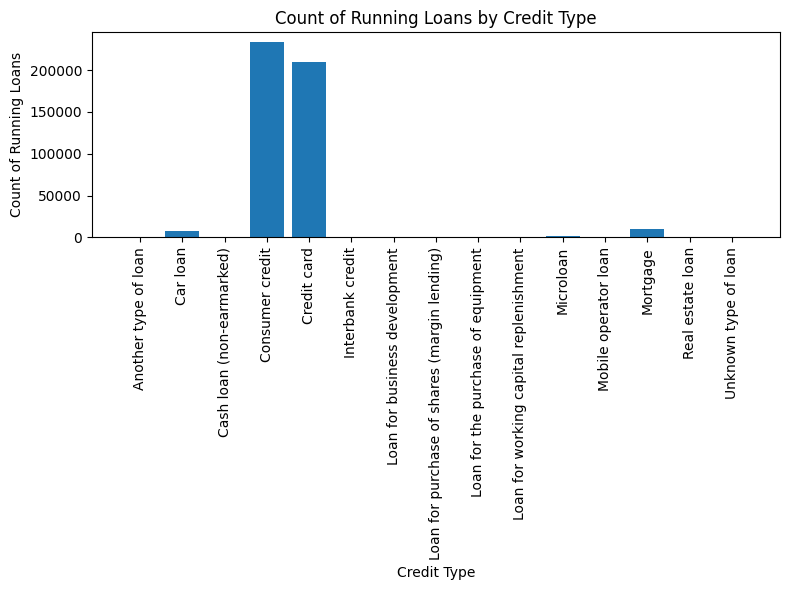

In [202]:
# Create a new column indicating whether closed_date is null
acnt_train['loan_status'] = acnt_train['closed_date'].isnull().map({True: 'Running', False: 'Closed'})

# Group by credit_type and loan_status to get the count of null values for each credit_type
null_counts = acnt_train.groupby(['credit_type', 'loan_status']).size().unstack(fill_value=0)['Running'].reset_index()

# Plot the count of null values for each credit_type
plt.figure(figsize=(8, 6))
plt.bar(null_counts['credit_type'], null_counts['Running'])
plt.xlabel('Credit Type')
plt.ylabel('Count of Running Loans')
plt.title('Count of Running Loans by Credit Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#SCATTER PLOT OF LONE AMOUNT

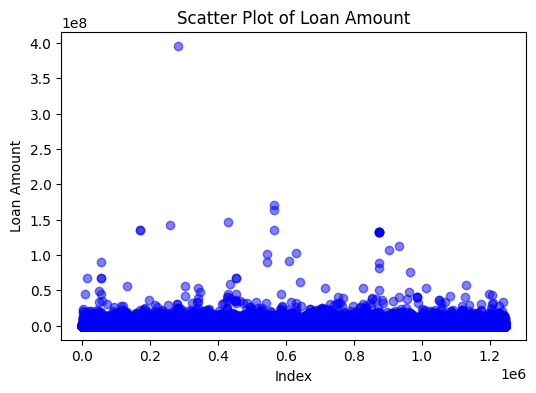

In [204]:
# Plot loan_amount using a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(range(len(acnt_train)), acnt_train['loan_amount'], color='b', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot of Loan Amount')
plt.show()

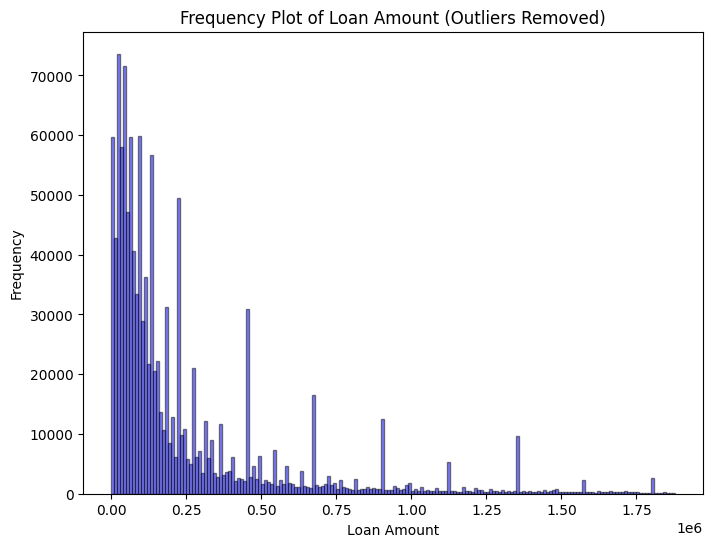

In [205]:
# Calculate the IQR
Q1 = acnt_train['loan_amount'].quantile(0.10)
Q3 = acnt_train['loan_amount'].quantile(0.90)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
filtered_acnt = acnt_train[(acnt_train['loan_amount'] >= lower_bound) & (acnt_train['loan_amount'] <= upper_bound)]

# Bucket size for loan_amount
bucket_size = 10000

# Calculate number of bins based on bucket size
num_bins = int((filtered_acnt['loan_amount'].max() - filtered_acnt['loan_amount'].min()) / bucket_size) + 1

# Plot loan_amount using a histogram
plt.figure(figsize=(8, 6))
plt.hist(filtered_acnt['loan_amount'], bins=num_bins, color='b', alpha=0.5, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Frequency Plot of Loan Amount (Outliers Removed)')
plt.show()

# Plot the average amount_overdue for each credit_type

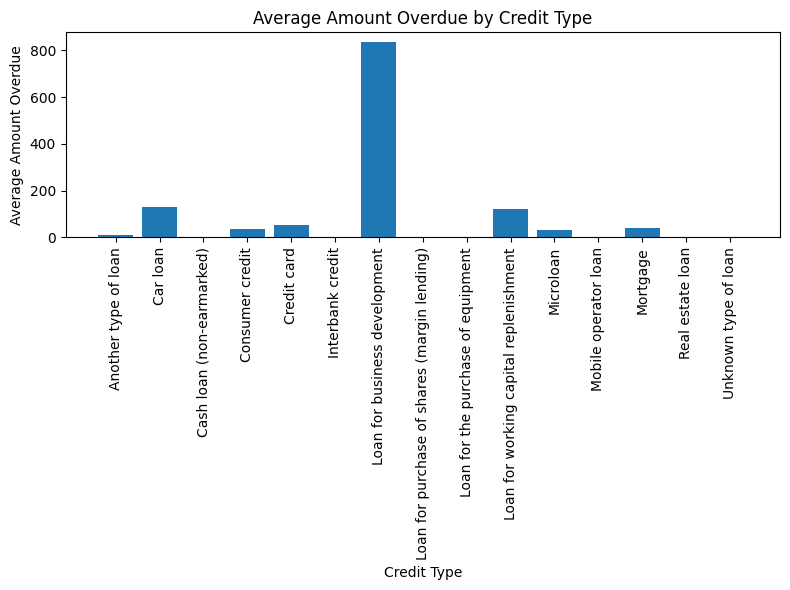

In [206]:
# Finding Average Over-Due for each Credit_Type
avg_overdue = acnt_train.groupby('credit_type')['amount_overdue'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(avg_overdue['credit_type'], avg_overdue['amount_overdue'])
plt.xlabel('Credit Type')
plt.ylabel('Average Amount Overdue')
plt.title('Average Amount Overdue by Credit Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot the average Loan Amount for each credit_type

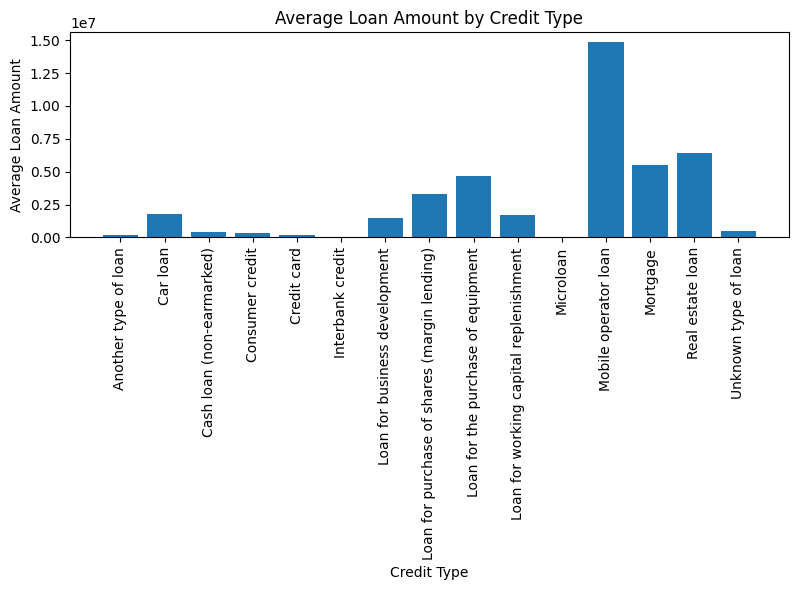

In [207]:
# Finding Average Loan Amount for each Credit_Type
avg_overdue = acnt_train.groupby('credit_type')['loan_amount'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(avg_overdue['credit_type'], avg_overdue['loan_amount'])
plt.xlabel('Credit Type')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Credit Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#NAN vs Loan AMount Visulaise

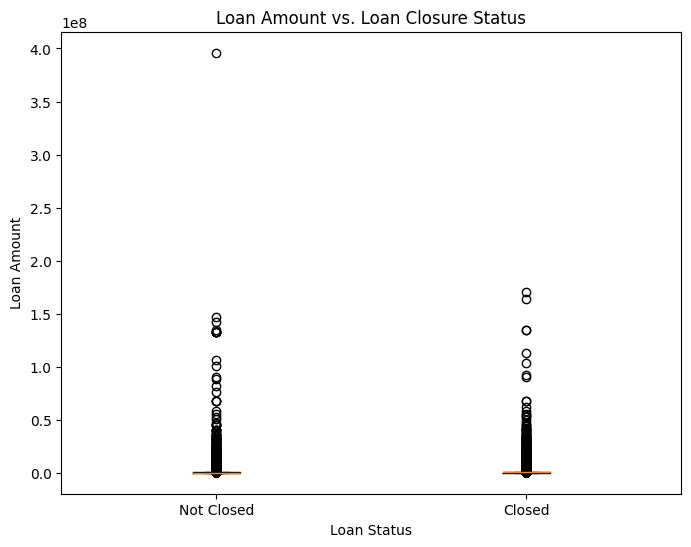

In [208]:
viz_df = pd.DataFrame({
    'loan_amount': acnt_train['loan_amount'],
    'closed': acnt_train['closed_date'].isnull().astype(int)
})

# Plot loan_amount vs. closed using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot([viz_df[viz_df['closed'] == 0]['loan_amount'].dropna(),
             viz_df[viz_df['closed'] == 1]['loan_amount'].dropna()],
            labels=['Not Closed', 'Closed'])
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs. Loan Closure Status')
plt.show()

#ENQUIRY DATA PART STARTS

In [210]:
print(enqry_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909926 entries, 0 to 1909925
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   enquiry_type  object
 1   enquiry_amt   int64 
 2   enquiry_date  object
 3   uid           object
dtypes: int64(1), object(3)
memory usage: 58.3+ MB
None


#ENQUIRY_PLOTS

#BAR PLOT for enquiry Type

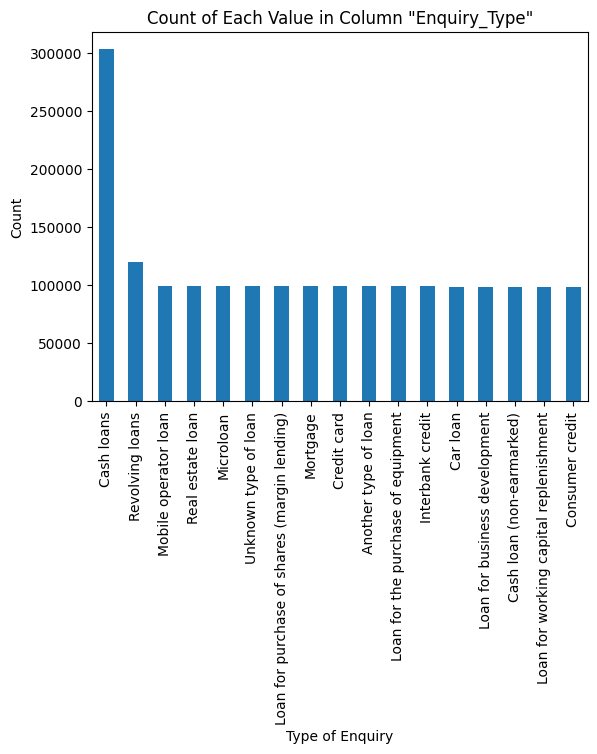

In [211]:
plt.figure()
enqry_train['enquiry_type'].value_counts().plot(kind='bar')
plt.xlabel('Type of Enquiry')
plt.ylabel('Count')
plt.title('Count of Each Value in Column "Enquiry_Type"')
plt.show()

In this apart from **Cash loans** & **Revolving Loans** all other types are similar in proportion

#PLOT of Average Enquiry Amount For each Enquiry Type

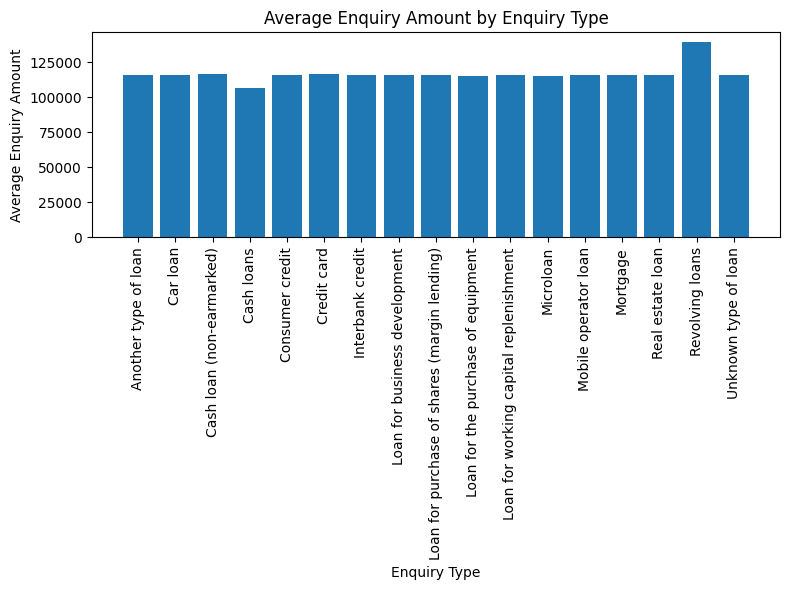

In [212]:
# Finding Average Over-Due for each Credit_Type
avg_overdue = enqry_train.groupby('enquiry_type')['enquiry_amt'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(avg_overdue['enquiry_type'], avg_overdue['enquiry_amt'])
plt.xlabel('Enquiry Type')
plt.ylabel('Average Enquiry Amount')
plt.title('Average Enquiry Amount by Enquiry Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Helping in Finding how Need Of Amount varies across Enquiry Type

In [37]:
acnt_cpy = acnt_train.copy()

In [38]:
#Dropping those rows where closed_date is NaN
acnt_cpy = acnt_cpy.dropna(subset=['closed_date'])

In [25]:
acnt_cpy.head()

credit_type  loan_amount  amount_overdue   open_date closed_date  \
0  Consumer credit     272745.0             0.0  2018-09-22  2020-02-22   
1  Consumer credit       4500.0             0.0  2018-03-08  2019-07-25   
3  Consumer credit      43771.5             0.0  2020-06-09  2020-09-09   
5  Consumer credit      46696.5             0.0  2016-11-20  2017-10-06   
6      Credit card          0.0             0.0  2014-09-10  2018-08-30   

                                 payment_hist_string          uid  
0  0000000000000000000000100000000000000000000000...  AAA09044550  
1   000000000000000014044000000000000000000000000000  AAA09044550  
3                                          000000000  AAA14112888  
5                     000000000000000000000000000000  AAA20326915  
6  0000000000000000000000000000000000000000000000...  AAA20326915

In [39]:
acnt_cpy['open_date'] = pd.to_datetime(acnt_cpy['open_date'])
acnt_cpy['closed_date'] = pd.to_datetime(acnt_cpy['closed_date'])

acnt_cpy['months_diff'] = (acnt_cpy['closed_date'].dt.to_period('M').astype(int) - acnt_cpy['open_date'].dt.to_period('M').astype(int))

In [40]:
acnt_cpy.head()

credit_type  loan_amount  amount_overdue  open_date closed_date  \
0  Consumer credit     272745.0             0.0 2018-09-22  2020-02-22   
1  Consumer credit       4500.0             0.0 2018-03-08  2019-07-25   
3  Consumer credit      43771.5             0.0 2020-06-09  2020-09-09   
5  Consumer credit      46696.5             0.0 2016-11-20  2017-10-06   
6      Credit card          0.0             0.0 2014-09-10  2018-08-30   

                                 payment_hist_string          uid  months_diff  
0  0000000000000000000000100000000000000000000000...  AAA09044550           17  
1   000000000000000014044000000000000000000000000000  AAA09044550           16  
3                                          000000000  AAA14112888            3  
5                     000000000000000000000000000000  AAA20326915           11  
6  0000000000000000000000000000000000000000000000...  AAA20326915           47

In [45]:
mask = acnt_cpy['months_diff'] * 3 == acnt_cpy['payment_hist_string'].str.len()
filtered_rows = acnt_cpy[mask]


#Here I checked where Days due for month was restricted to max 31 days or not , which was not found we can see months values >31

In [49]:
filtered_rows.head(20)

credit_type  loan_amount  amount_overdue  open_date closed_date  \
0   Consumer credit    272745.00             0.0 2018-09-22  2020-02-22   
1   Consumer credit      4500.00             0.0 2018-03-08  2019-07-25   
3   Consumer credit     43771.50             0.0 2020-06-09  2020-09-09   
7   Consumer credit    117000.00             0.0 2018-02-04  2018-05-06   
8   Consumer credit     90000.00             0.0 2020-03-12  2020-04-12   
13  Consumer credit     41845.50             0.0 2017-02-15  2018-02-28   
15  Consumer credit    304965.00             0.0 2019-04-15  2020-10-15   
17  Consumer credit     61762.50             0.0 2017-10-02  2018-04-02   
18  Consumer credit     50940.00             0.0 2020-01-08  2020-11-08   
21  Consumer credit     46407.96             0.0 2018-04-16  2018-09-16   
24  Consumer credit     46404.00             0.0 2018-04-15  2018-09-16   
27  Consumer credit     80721.00             0.0 2018-10-11  2019-10-11   
29  Consumer credit    110565.00             0.0 2017-11-05  2018-09-08   
30  Consumer credit    116280.00             0.0 2018-06-26  2019-05-28   
31  Consumer credit    450000.00             0.0 2014-03-14  2015-09-12   
32  Consumer credit    468000.00             0.0 2018-05-07  2019-03-08   
35  Consumer credit    278460.00             0.0 2018-11-22  2020-11-21   
36  Consumer credit     34497.00             0.0 2018-02-08  2018-08-09   
41  Consumer credit     46597.50             0.0 2018-08-03  2019-02-03   
42  Consumer credit    225000.00             0.0 2019-05-22  2020-05-25   

                                  payment_hist_string          uid  \
0   0000000000000000000000100000000000000000000000...  AAA09044550   
1    000000000000000014044000000000000000000000000000  AAA09044550   
3                                           000000000  AAA14112888   
7                                           000000000  AAA20326915   
8                                                 000  AAA20326915   
13               000000000000000000000000000000000000  AAA31604840   
15  0000000000000000000000000000000000000000000000...  AAA31604840   
17                                 000000000000000000  AAA54240429   
18                     000000000000000000000000000000  AAA56011736   
21                                    000000000000000  AAA56011736   
24                                    000000000000000  AAA56011736   
27               000000000000000000021051000000000000  AAA89688332   
29                     000000000000000000000000000000  AAB09356880   
30                  000000000000000000000000000000000  AAB09356880   
31  0000000000000000000000000000000000000000000000...  AAB18081226   
32                     000000000000000000000000000000  AAB18081226   
35  0000000000000000000000000000000000000000000000...  AAB18081226   
36                                 000000000000000000  AAB18081226   
41                                 000000000000000000  AAB18081226   
42               000000000000000000000000000000000000  AAB18081226   

    months_diff  
0            17  
1            16  
3             3  
7             3  
8             1  
13           12  
15           18  
17            6  
18           10  
21            5  
24            5  
27           12  
29           10  
30           11  
31           18  
32           10  
35           24  
36            6  
41            6  
42           12

# There was many rows where where closed_date entry was NaN , so inorder to fill that . The Dataset would have been prepared at a particular data and those which have been running would have been marked NaN , so for that i find out length of payment_hist_string and divided by 3 to get duration of payment history , i found a common year and month i.e. 2020-12 , which every open_date was falling to after adding that length.

In [50]:
# making new Column having payment_month_duration
new_column = acnt_train['payment_hist_string'].apply(lambda x: len(str(x))/3 if isinstance(x, str) else None)
new_df = pd.concat([acnt_train, pd.DataFrame(new_column.rename('payment_month_len'))], axis=1)


In [51]:
new_df.head()

credit_type  loan_amount  amount_overdue   open_date closed_date  \
0  Consumer credit   272745.000             0.0  2018-09-22  2020-02-22   
1  Consumer credit     4500.000             0.0  2018-03-08  2019-07-25   
2      Credit card    80996.445             0.0  2020-06-29         NaN   
3  Consumer credit    43771.500             0.0  2020-06-09  2020-09-09   
4      Credit card    10480.500             0.0  2014-09-10         NaN   

                                 payment_hist_string          uid  \
0  0000000000000000000000100000000000000000000000...  AAA09044550   
1   000000000000000014044000000000000000000000000000  AAA09044550   
2                                 000000000000000000  AAA10545297   
3                                          000000000  AAA14112888   
4  0000000000000000000000000000000000000000000000...  AAA20326915   

   payment_month_len  
0               17.0  
1               16.0  
2                6.0  
3                3.0  
4               76.0

In [52]:
# Taking only rows where closed_date is NaN
nan_rows = new_df[new_df['closed_date'].isna()]

#We can see all of the open_date when added with payment_month_len , gives 2020-12

In [54]:
nan_rows.head(10)

credit_type  loan_amount  amount_overdue   open_date closed_date  \
2       Credit card    80996.445             0.0  2020-06-29         NaN   
4       Credit card    10480.500             0.0  2014-09-10         NaN   
10  Consumer credit    46620.000             0.0  2020-06-22         NaN   
11      Credit card    45000.000             0.0  2020-06-28         NaN   
12  Consumer credit   687150.000             0.0  2020-10-10         NaN   
14  Consumer credit   468000.000             0.0  2017-06-09         NaN   
16      Credit card    90000.000             0.0  2020-09-16         NaN   
19  Consumer credit   225000.000             0.0  2013-09-24         NaN   
20  Consumer credit   729000.000             0.0  2020-01-12         NaN   
22      Credit card   117000.000             0.0  2018-07-07         NaN   

                                  payment_hist_string          uid  \
2                                  000000000000000000  AAA10545297   
4   0000000000000000000000000000000000000000000000...  AAA20326915   
10                                 000000000000000000  AAA20326915   
11                                 000000000000000000  AAA20326915   
12                                             000000  AAA31604840   
14  0000000000000000000000000000000000000000000000...  AAA31604840   
16                                          000000000  AAA31604840   
19  0000000000000000000000000000000000000000000000...  AAA56011736   
20                  000000000000000000000000000000000  AAA56011736   
22  0000000000000000000000000000000000000000000000...  AAA56011736   

    payment_month_len  
2                 6.0  
4                76.0  
10                6.0  
11                6.0  
12                2.0  
14               43.0  
16                3.0  
19               88.0  
20               11.0  
22               30.0

# Removing NaN and putting 2020-12-30 as closed_date for NaN Rows

In [92]:
acnt_train['closed_date'] = acnt_train['closed_date'].fillna('2020-12-30')

In [93]:
acnt_train.head(10)

credit_type  loan_amount  amount_overdue   open_date closed_date  \
0  Consumer credit   272745.000             0.0  2018-09-22  2020-02-22   
1  Consumer credit     4500.000             0.0  2018-03-08  2019-07-25   
2      Credit card    80996.445             0.0  2020-06-29  2020-12-30   
3  Consumer credit    43771.500             0.0  2020-06-09  2020-09-09   
4      Credit card    10480.500             0.0  2014-09-10  2020-12-30   
5  Consumer credit    46696.500             0.0  2016-11-20  2017-10-06   
6      Credit card        0.000             0.0  2014-09-10  2018-08-30   
7  Consumer credit   117000.000             0.0  2018-02-04  2018-05-06   
8  Consumer credit    90000.000             0.0  2020-03-12  2020-04-12   
9  Consumer credit   235800.000             0.0  2020-03-29  2020-05-13   

                                 payment_hist_string          uid  
0  0000000000000000000000100000000000000000000000...  AAA09044550  
1   000000000000000014044000000000000000000000000000  AAA09044550  
2                                 000000000000000000  AAA10545297  
3                                          000000000  AAA14112888  
4  0000000000000000000000000000000000000000000000...  AAA20326915  
5                     000000000000000000000000000000  AAA20326915  
6  0000000000000000000000000000000000000000000000...  AAA20326915  
7                                          000000000  AAA20326915  
8                                                000  AAA20326915  
9                                                000  AAA20326915

#Now many of the of the payment_hist_string are not multiple of 3 so , iam taking string_length % by 3 , whatever remainder iam getting , iam subtracting with 3 to get number of 0 to append  , iam appending at starting of string .

#Reason for appending at starting because , string could be 04 , and if i appedn 0 at last then it would become 042 which will give 42 dues days for that month

In [ ]:
# Creating New Column Named modified_str , which contains appended 0's
acnt_train['modified_str'] = acnt_train['payment_hist_string'].astype(str)

# Modify the 'modified_str' column based on the conditions
for i in range(len(acnt_train)):
    str_len = len(str(acnt_train['payment_hist_string'][i]))
    if str_len % 3 != 0:
        num_zeros = 3 - (str_len % 3)  # Calculate number of zeros to append
        acnt_train['modified_str'][i] = ('0' * num_zeros) +(acnt_train['modified_str'][i])
    else:
        if str_len==0:
          acnt_train['modified_str'][i]='000'

In [95]:
acnt_train['open_date'] = pd.to_datetime(acnt_train['open_date'])
acnt_train['closed_date'] = pd.to_datetime(acnt_train['closed_date'])

acnt_train['months_diff'] = (acnt_train['closed_date'].dt.to_period('M').astype(int) - acnt_train['open_date'].dt.to_period('M').astype(int))

In [96]:
acnt_train.head()

credit_type  loan_amount  amount_overdue  open_date closed_date  \
0  Consumer credit   272745.000             0.0 2018-09-22  2020-02-22   
1  Consumer credit     4500.000             0.0 2018-03-08  2019-07-25   
2      Credit card    80996.445             0.0 2020-06-29  2020-12-30   
3  Consumer credit    43771.500             0.0 2020-06-09  2020-09-09   
4      Credit card    10480.500             0.0 2014-09-10  2020-12-30   

                                 payment_hist_string          uid  \
0  0000000000000000000000100000000000000000000000...  AAA09044550   
1   000000000000000014044000000000000000000000000000  AAA09044550   
2                                 000000000000000000  AAA10545297   
3                                          000000000  AAA14112888   
4  0000000000000000000000000000000000000000000000...  AAA20326915   

                                        modified_str  months_diff  
0  0000000000000000000000100000000000000000000000...           17  
1   000000000000000014044000000000000000000000000000           16  
2                                 000000000000000000            6  
3                                          000000000            3  
4  0000000000000000000000000000000000000000000000...           75

In [78]:
def find_total_month_due(str_len,row_idx,df):
  month_due=0
  for i in range(0,str_len,3):
    val=(int(str(df['modified_str'][row_idx])[i:i+3]))
    if(val>0):
      month_due+=1
  return month_due


In [79]:
def find_total_month_due_bw_15_30(str_len,row_idx,df):
    due_15=0
    for i in range(0,str_len,3):
      val=(int(str(df['modified_str'][row_idx])[i:i+3]))
      if(val>=15 and val<30):
        due_15+=1
    return due_15


In [80]:
def find_total_month_due_bw_30_90(str_len,row_idx,df):
  due_30=0
  for i in range(0,str_len,3):
    val=(int(str(df['modified_str'][row_idx])[i:i+3]))
    if(val>=30 and val<90):
      due_30+=1
  return due_30

In [81]:
def find_total_month_due_90(str_len,row_idx,df):
  due_90=0
  for i in range(0,str_len,3):
    val=(int(str(df['modified_str'][row_idx])[i:i+3]))
    if(val>=90):
      due_90+=1
  return due_90

In [82]:
def find_total_subsequent_due(str_len,row_idx,df):
  total_sub_due=0
  for i in range(0,str_len,3):
    if(i>0):
      val=(int(str(df['modified_str'][row_idx])[i:i+3]))
      prev_val=(int(str(df['modified_str'][row_idx])[i-3:i]))
      if(prev_val >0 and val >0 ):
        total_sub_due+=1
  return total_sub_due

In [83]:
def find_max_subsequent_due(str_len,row_idx,df):
  max_sub_due=0
  sub_due=0
  for i in range(0,str_len,3):
    if(i>0):
      prev_val=(int(str(df['modified_str'][row_idx])[i-3:i]))
      val=(int(str(df['modified_str'][row_idx])[i:i+3]))
      if(prev_val >0 and val >0 ):
        sub_due+=1
        max_sub_due=max(max_sub_due,sub_due)
      else:
        sub_due=0
  return max_sub_due

In [84]:
def find_max_days_due(str_len,row_idx,df):
  max_days_due=0
  for i in range(0,str_len,3):
    val=(int(str(df['modified_str'][row_idx])[i:i+3]))
    if(max_days_due < val):
      max_days_due=val
  return max_days_due

In [85]:
def find_max_recent_subsequent_due(str_len,row_idx,df):
  sub_due=0
  find_max_recent_due=0
  idx=str_len-6
  cur_month_cnt=2;
  while(idx>=0  and cur_month_cnt<=12):
    val=(int(str(df['modified_str'][row_idx])[idx:idx+3]))
    next_val=(int(str(df['modified_str'][row_idx])[idx+3:idx+6]))
    if(val>0 and next_val>0):
      sub_due+=1
      find_max_recent_due=max(find_max_recent_due,sub_due)
    else:
      sub_due=0
    idx-=3
    cur_month_cnt+=1
  return find_max_recent_due

In [86]:
# Calculating Values of Various Due Days Features
#1. Total Months in which there is due
#2. Total Months in which Due is >=15 & <30 days
#3. Total Months in which Due is >=30 & <90 days
#4. Total Months in which Due is >=90 days
#5. Total Months in which there is Subsequent Due
#6. Max Subsequent due
#7. Max Recent Subsequent due
#8. Max days due
total_month_due={}
cnt_months_due_bw_15_30={}
cnt_months_due_bw_30_90={}
cnt_months_due_90={}
cnt_subsequent_due={}
max_subsequent_due={}
max_recent_subsequent_due={}
max_days_due={}
for j in range(len(acnt_train)):
  str_len=len(acnt_train['modified_str'][j])
  # Functions to calculate values for each rows
  total_month_due[j]=find_total_month_due(str_len,j,acnt_train)
  cnt_months_due_bw_15_30[j]=find_total_month_due_bw_15_30(str_len,j,acnt_train)
  cnt_months_due_bw_30_90[j]=find_total_month_due_bw_30_90(str_len,j,acnt_train)
  cnt_months_due_90[j]=find_total_month_due_90(str_len,j,acnt_train)
  cnt_subsequent_due[j]=find_total_subsequent_due(str_len,j,acnt_train)
  max_subsequent_due[j]=find_max_subsequent_due(str_len,j,acnt_train)
  max_recent_subsequent_due[j]=find_max_recent_subsequent_due(str_len,j,acnt_train)
  max_days_due[j]= find_max_days_due(str_len,j,acnt_train)

In [87]:
Due_info_train = pd.DataFrame({
    'total_month_due': list(total_month_due.values()),
    'months_due_bw_15_30': list(cnt_months_due_bw_15_30.values()),
    'months_due_bw_30_90': list(cnt_months_due_bw_30_90.values()),
    'months_due_90': list(cnt_months_due_90.values()),
    'subsequent_due': list(cnt_subsequent_due.values()),
    'max_subsequent_due': list(max_subsequent_due.values()),
    'max_recent_subsequent_due': list(max_recent_subsequent_due.values()),
    'max_days_due': list(max_days_due.values())
})

In [88]:
import pickle

# Save DataFrame to a file
with open('Due_inf_train3.pkl', 'wb') as f:
    pickle.dump(Due_info_train, f)

#Features which have been Genrated From Payment_Hist_string

In [90]:
Due_info_train.head(10)

total_month_due  months_due_bw_15_30  months_due_bw_30_90  months_due_90  \
0                1                    0                    0              0   
1                2                    0                    1              0   
2                0                    0                    0              0   
3                0                    0                    0              0   
4               31                    1                    2             28   
5                0                    0                    0              0   
6                0                    0                    0              0   
7                0                    0                    0              0   
8                0                    0                    0              0   
9                0                    0                    0              0   

   subsequent_due  max_subsequent_due  max_recent_subsequent_due  max_days_due  
0               0                   0                          0            10  
1               1                   1                          1            44  
2               0                   0                          0             0  
3               0                   0                          0             0  
4              30                  30                          7           917  
5               0                   0                          0             0  
6               0                   0                          0             0  
7               0                   0                          0             0  
8               0                   0                          0             0  
9               0                   0                          0             0

In [98]:
acnt_train_concat=pd.concat([acnt_train,Due_info_train], axis=1)

In [99]:
acnt_train_concat.head()

credit_type  loan_amount  amount_overdue  open_date closed_date  \
0  Consumer credit   272745.000             0.0 2018-09-22  2020-02-22   
1  Consumer credit     4500.000             0.0 2018-03-08  2019-07-25   
2      Credit card    80996.445             0.0 2020-06-29  2020-12-30   
3  Consumer credit    43771.500             0.0 2020-06-09  2020-09-09   
4      Credit card    10480.500             0.0 2014-09-10  2020-12-30   

                                 payment_hist_string          uid  \
0  0000000000000000000000100000000000000000000000...  AAA09044550   
1   000000000000000014044000000000000000000000000000  AAA09044550   
2                                 000000000000000000  AAA10545297   
3                                          000000000  AAA14112888   
4  0000000000000000000000000000000000000000000000...  AAA20326915   

                                        modified_str  months_diff  \
0  0000000000000000000000100000000000000000000000...           17   
1   000000000000000014044000000000000000000000000000           16   
2                                 000000000000000000            6   
3                                          000000000            3   
4  0000000000000000000000000000000000000000000000...           75   

   total_month_due  months_due_bw_15_30  months_due_bw_30_90  months_due_90  \
0                1                    0                    0              0   
1                2                    0                    1              0   
2                0                    0                    0              0   
3                0                    0                    0              0   
4               31                    1                    2             28   

   subsequent_due  max_subsequent_due  max_recent_subsequent_due  max_days_due  
0               0                   0                          0            10  
1               1                   1                          1            44  
2               0                   0                          0             0  
3               0                   0                          0             0  
4              30                  30                          7           917

In [100]:
merged_train = pd.merge(acnt_train_concat, enqry_train, left_on=['uid', 'credit_type'], right_on=['uid', 'enquiry_type'])

In [101]:
merged_train.head()

credit_type  loan_amount  amount_overdue  open_date closed_date  \
0  Consumer credit   272745.000             0.0 2018-09-22  2020-02-22   
1  Consumer credit     4500.000             0.0 2018-03-08  2019-07-25   
2      Credit card    80996.445             0.0 2020-06-29  2020-12-30   
3      Credit card    80996.445             0.0 2020-06-29  2020-12-30   
4  Consumer credit    43771.500             0.0 2020-06-09  2020-09-09   

                                 payment_hist_string          uid  \
0  0000000000000000000000100000000000000000000000...  AAA09044550   
1   000000000000000014044000000000000000000000000000  AAA09044550   
2                                 000000000000000000  AAA10545297   
3                                 000000000000000000  AAA10545297   
4                                          000000000  AAA14112888   

                                        modified_str  months_diff  \
0  0000000000000000000000100000000000000000000000...           17   
1   000000000000000014044000000000000000000000000000           16   
2                                 000000000000000000            6   
3                                 000000000000000000            6   
4                                          000000000            3   

   total_month_due  months_due_bw_15_30  months_due_bw_30_90  months_due_90  \
0                1                    0                    0              0   
1                2                    0                    1              0   
2                0                    0                    0              0   
3                0                    0                    0              0   
4                0                    0                    0              0   

   subsequent_due  max_subsequent_due  max_recent_subsequent_due  \
0               0                   0                          0   
1               1                   1                          1   
2               0                   0                          0   
3               0                   0                          0   
4               0                   0                          0   

   max_days_due     enquiry_type  enquiry_amt enquiry_date  
0            10  Consumer credit       111000   2020-12-11  
1            44  Consumer credit       111000   2020-12-11  
2             0      Credit card       142000   2019-12-26  
3             0      Credit card        94000   2018-07-06  
4             0  Consumer credit        62000   2020-03-10

#Now The Flag Dataset Contains Loans Into 2 Categories Revolve loans , Cash Loans so the credit_type we are having we need to allocat these 2 one of the 2 types of loans ,so that we can merge with Flag Table

In [104]:
Flag_train.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [105]:
# writting code to categories credit_type between these 2 category of Flag Dataset
cash_loans = [
    'Consumer credit',
    'Loan for business development',
    'Microloan',
    'Another type of loan',
    'Loan for working capital replenishment',
    'Loan for the purchase of equipment',
    'Real estate loan',
    'Cash loan (non-earmarked)',
    'Loan for purchase of shares (margin lending)',
    'Interbank credit',
    'Mobile operator loan'
]

revolving_loans = [
    'Credit card',
    'Mortgage',
    'Car loan'
]

def categorize_loan(loan_type):
    if loan_type in cash_loans:
        return 'Cash loans'
    elif loan_type in revolving_loans:
        return 'Revolving loans'
    else:
        return 'Unknown'


In [106]:
#Making New Column loan_category
merged_train['loan_category'] = merged_train['credit_type'].apply(categorize_loan)

In [107]:
merged_train.head()

credit_type  loan_amount  amount_overdue  open_date closed_date  \
0  Consumer credit   272745.000             0.0 2018-09-22  2020-02-22   
1  Consumer credit     4500.000             0.0 2018-03-08  2019-07-25   
2      Credit card    80996.445             0.0 2020-06-29  2020-12-30   
3      Credit card    80996.445             0.0 2020-06-29  2020-12-30   
4  Consumer credit    43771.500             0.0 2020-06-09  2020-09-09   

                                 payment_hist_string          uid  \
0  0000000000000000000000100000000000000000000000...  AAA09044550   
1   000000000000000014044000000000000000000000000000  AAA09044550   
2                                 000000000000000000  AAA10545297   
3                                 000000000000000000  AAA10545297   
4                                          000000000  AAA14112888   

                                        modified_str  months_diff  \
0  0000000000000000000000100000000000000000000000...           17   
1   000000000000000014044000000000000000000000000000           16   
2                                 000000000000000000            6   
3                                 000000000000000000            6   
4                                          000000000            3   

   total_month_due  ...  months_due_bw_30_90  months_due_90  subsequent_due  \
0                1  ...                    0              0               0   
1                2  ...                    1              0               1   
2                0  ...                    0              0               0   
3                0  ...                    0              0               0   
4                0  ...                    0              0               0   

   max_subsequent_due  max_recent_subsequent_due  max_days_due  \
0                   0                          0            10   
1                   1                          1            44   
2                   0                          0             0   
3                   0                          0             0   
4                   0                          0             0   

      enquiry_type enquiry_amt  enquiry_date    loan_category  
0  Consumer credit      111000    2020-12-11       Cash loans  
1  Consumer credit      111000    2020-12-11       Cash loans  
2      Credit card      142000    2019-12-26  Revolving loans  
3      Credit card       94000    2018-07-06  Revolving loans  
4  Consumer credit       62000    2020-03-10       Cash loans  

[5 rows x 21 columns]

In [108]:
#Merging with Flag Dataset
merged_train_final = pd.merge(merged_train, Flag_train, left_on=['uid', 'loan_category'], right_on=['uid', 'NAME_CONTRACT_TYPE'])

In [109]:
merged_train_final.head()

credit_type  loan_amount  amount_overdue  open_date closed_date  \
0  Consumer credit     272745.0             0.0 2018-09-22  2020-02-22   
1  Consumer credit       4500.0             0.0 2018-03-08  2019-07-25   
2  Consumer credit      43771.5             0.0 2020-06-09  2020-09-09   
3  Consumer credit      43771.5             0.0 2020-06-09  2020-09-09   
4  Consumer credit     687150.0             0.0 2020-10-10  2020-12-30   

                                 payment_hist_string          uid  \
0  0000000000000000000000100000000000000000000000...  AAA09044550   
1   000000000000000014044000000000000000000000000000  AAA09044550   
2                                          000000000  AAA14112888   
3                                          000000000  AAA14112888   
4                                             000000  AAA31604840   

                                        modified_str  months_diff  \
0  0000000000000000000000100000000000000000000000...           17   
1   000000000000000014044000000000000000000000000000           16   
2                                          000000000            3   
3                                          000000000            3   
4                                             000000            2   

   total_month_due  ...  subsequent_due  max_subsequent_due  \
0                1  ...               0                   0   
1                2  ...               1                   1   
2                0  ...               0                   0   
3                0  ...               0                   0   
4                0  ...               0                   0   

   max_recent_subsequent_due  max_days_due     enquiry_type  enquiry_amt  \
0                          0            10  Consumer credit       111000   
1                          1            44  Consumer credit       111000   
2                          0             0  Consumer credit        62000   
3                          0             0  Consumer credit        84000   
4                          0             0  Consumer credit       179000   

   enquiry_date loan_category  NAME_CONTRACT_TYPE TARGET  
0    2020-12-11    Cash loans          Cash loans      0  
1    2020-12-11    Cash loans          Cash loans      0  
2    2020-03-10    Cash loans          Cash loans      0  
3    2018-01-06    Cash loans          Cash loans      0  
4    2018-08-25    Cash loans          Cash loans      0  

[5 rows x 23 columns]

In [110]:
# Save DataFrame to a file
with open('merged_train_final1.pkl', 'wb') as f:
    pickle.dump(merged_train_final, f)

In [115]:
merged_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327564 entries, 0 to 327563
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_type                327564 non-null  object        
 1   loan_amount                327561 non-null  float64       
 2   amount_overdue             327564 non-null  float64       
 3   open_date                  327564 non-null  datetime64[ns]
 4   closed_date                327564 non-null  datetime64[ns]
 5   payment_hist_string        327564 non-null  object        
 6   uid                        327564 non-null  object        
 7   modified_str               327564 non-null  object        
 8   months_diff                327564 non-null  int64         
 9   total_month_due            327564 non-null  int64         
 10  months_due_bw_15_30        327564 non-null  int64         
 11  months_due_bw_30_90        327564 non-null  int64   

In [118]:
# loan_amount has some NULL VALUES so dropping it
merged_train_final = merged_train_final.dropna(subset=['loan_amount'])

In [119]:
merged_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327561 entries, 0 to 327563
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_type                327561 non-null  object        
 1   loan_amount                327561 non-null  float64       
 2   amount_overdue             327561 non-null  float64       
 3   open_date                  327561 non-null  datetime64[ns]
 4   closed_date                327561 non-null  datetime64[ns]
 5   payment_hist_string        327561 non-null  object        
 6   uid                        327561 non-null  object        
 7   modified_str               327561 non-null  object        
 8   months_diff                327561 non-null  int64         
 9   total_month_due            327561 non-null  int64         
 10  months_due_bw_15_30        327561 non-null  int64         
 11  months_due_bw_30_90        327561 non-null  int64        

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plotting Co-Relation Matrix to see Strenth Of Realtion Between different Numerical Columns

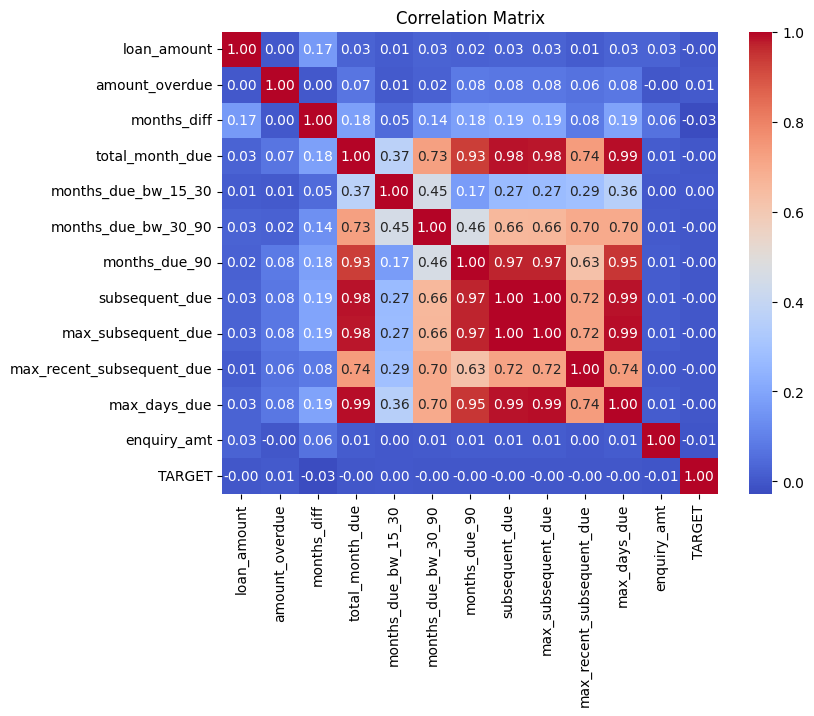

In [112]:
numeric_columns =merged_train_final.select_dtypes(include=['number']).columns
correlation_matrix =merged_train_final[numeric_columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [124]:
#Selecting Relevant Features For Prediction
selected_columns = ['loan_amount','loan_category','amount_overdue','enquiry_amt','max_days_due','max_subsequent_due','months_due_bw_15_30','months_due_bw_30_90','TARGET']
train_data=merged_train_final[selected_columns]

In [132]:
train_data = pd.get_dummies(train_data, columns=['loan_category'],prefix='')
train_data['_Cash loans']=train_data['_Cash loans'].astype(int)
train_data['_Revolving loans']=train_data['_Revolving loans'].astype(int)
train_data.head()

loan_amount  amount_overdue  enquiry_amt  max_days_due  max_subsequent_due  \
0     272745.0             0.0       111000            10                   0   
1       4500.0             0.0       111000            44                   1   
2      43771.5             0.0        62000             0                   0   
3      43771.5             0.0        84000             0                   0   
4     687150.0             0.0       179000             0                   0   

   months_due_bw_15_30  months_due_bw_30_90  TARGET  _Cash loans  \
0                    0                    0       0            1   
1                    0                    1       0            1   
2                    0                    0       0            1   
3                    0                    0       0            1   
4                    0                    0       0            1   

   _Revolving loans  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [126]:
train_data.TARGET.value_counts()

TARGET
0    302308
1     25253
Name: count, dtype: int64

In [133]:
X1_train = train_data.drop('TARGET', axis=1)
Y1_train = train_data['TARGET']

#DOING UnderSAMPLING SAMPLING

In [134]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1_train ,Y1_train, test_size=0.2, random_state=42)

# Applying Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

Classification Report (With Under Sampling):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     60601
           1       0.18      0.00      0.01      4912

    accuracy                           0.92     65513
   macro avg       0.55      0.50      0.48     65513
weighted avg       0.87      0.92      0.89     65513

ROC AUC Score (With Under Sampling): 0.5025004441800043


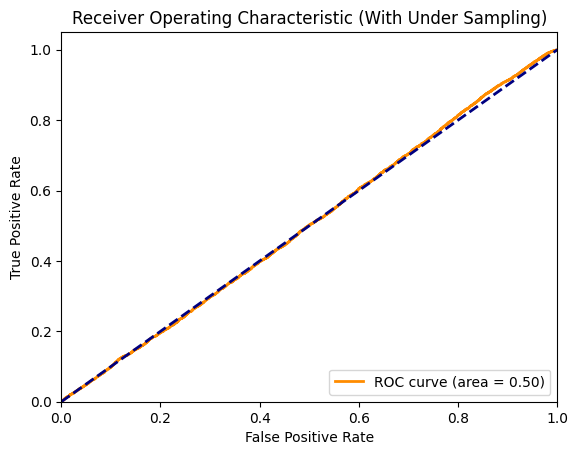

In [147]:
from sklearn.linear_model import LogisticRegression
# Initialize and train RandomForest classifier on resampled data
classifier_rus_logistic_u = LogisticRegression()
classifier_rus_logistic_u.fit(X_resampled, y_resampled)

# Predict test set
y_pred_rus = classifier_rus_logistic_u.predict(X_test)
y_proba_rus = classifier_rus_logistic_u.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Under Sampling):")
print(classification_report(y_test, y_pred_rus))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Under Sampling):", roc_auc_score(y_test, y_proba_rus))

# Plotting ROC AUC Curve for resampled data
fpr_rus, tpr_rus, _ = roc_curve(y_test, y_proba_rus)
plt.figure()
plt.plot(fpr_rus, tpr_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_rus))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Under Sampling)')
plt.legend(loc="lower right")
plt.show()


Classification Report (With Under Sampling):
              precision    recall  f1-score   support

           0       0.94      0.55      0.70     60601
           1       0.09      0.53      0.15      4912

    accuracy                           0.55     65513
   macro avg       0.51      0.54      0.42     65513
weighted avg       0.87      0.55      0.66     65513

ROC AUC Score (With Under Sampling): 0.5440576274071655


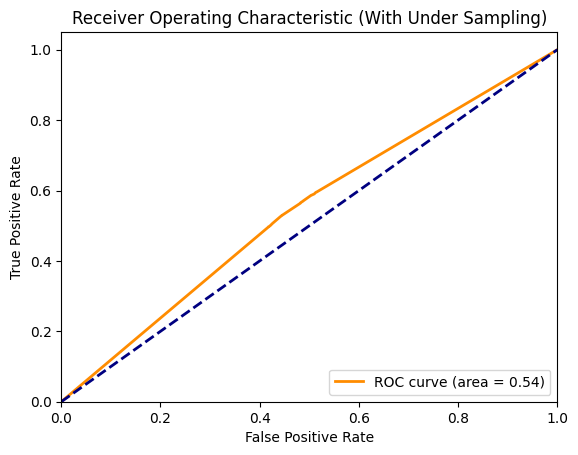

In [148]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree classifier on resampled data
classifier_rus_DT_u = DecisionTreeClassifier()
classifier_rus_DT_u.fit(X_resampled, y_resampled)

# Predict test set
y_pred_rus = classifier_rus_DT_u.predict(X_test)
y_proba_rus = classifier_rus_DT_u.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Under Sampling):")
print(classification_report(y_test, y_pred_rus))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Under Sampling):", roc_auc_score(y_test, y_proba_rus))

# Plotting ROC AUC Curve for resampled data
fpr_rus, tpr_rus, _ = roc_curve(y_test, y_proba_rus)
plt.figure()
plt.plot(fpr_rus, tpr_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_rus))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Under Sampling)')
plt.legend(loc="lower right")
plt.show()


Classification Report (With Under Sampling):
              precision    recall  f1-score   support

           0       0.94      0.54      0.68     60601
           1       0.09      0.55      0.15      4912

    accuracy                           0.54     65513
   macro avg       0.51      0.54      0.42     65513
weighted avg       0.87      0.54      0.64     65513

ROC AUC Score (With Under Sampling): 0.5634160481919784


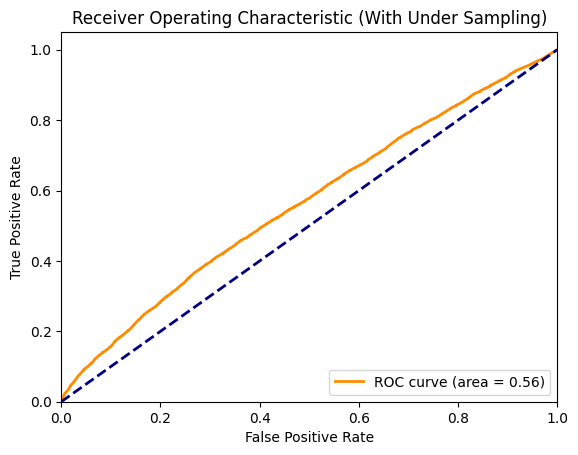

In [149]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train RandomForest classifier on resampled data
classifier_rus_RF_u = RandomForestClassifier()
classifier_rus_RF_u.fit(X_resampled, y_resampled)

# Predict test set
y_pred_rus = classifier_rus_RF_u.predict(X_test)
y_proba_rus = classifier_rus_RF_u.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Under Sampling):")
print(classification_report(y_test, y_pred_rus))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Under Sampling):", roc_auc_score(y_test, y_proba_rus))

# Plotting ROC AUC Curve for resampled data
fpr_rus, tpr_rus, _ = roc_curve(y_test, y_proba_rus)
plt.figure()
plt.plot(fpr_rus, tpr_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_rus))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Under Sampling)')
plt.legend(loc="lower right")
plt.show()


In [141]:
# Install XGBoost if not already installed
!pip install xgboost

Classification Report (With Under Sampling):
              precision    recall  f1-score   support

           0       0.93      0.57      0.71     60601
           1       0.09      0.51      0.15      4912

    accuracy                           0.57     65513
   macro avg       0.51      0.54      0.43     65513
weighted avg       0.87      0.57      0.67     65513

ROC AUC Score (With Under Sampling): 0.5612426988121749


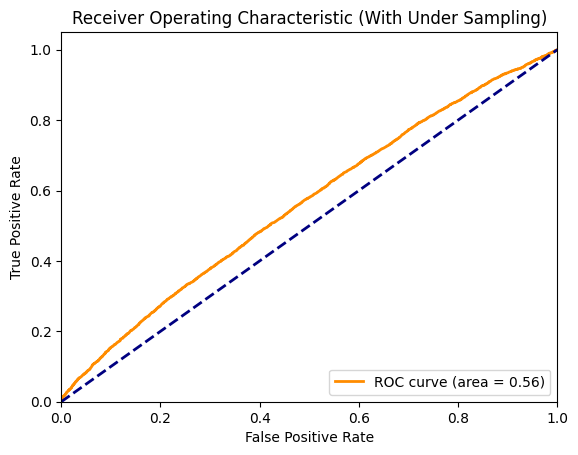

In [150]:
from xgboost import XGBClassifier

# Initialize and train XGBoost classifier on resampled data
classifier_rus_XG_u = XGBClassifier()
classifier_rus_XG_u.fit(X_resampled, y_resampled)

# Predict test set
y_pred_rus = classifier_rus_XG_u.predict(X_test)
y_proba_rus = classifier_rus_XG_u.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Under Sampling):")
print(classification_report(y_test, y_pred_rus))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Under Sampling):", roc_auc_score(y_test, y_proba_rus))

# Plotting ROC AUC Curve for resampled data
fpr_rus, tpr_rus, _ = roc_curve(y_test, y_proba_rus)
plt.figure()
plt.plot(fpr_rus, tpr_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_rus))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Under Sampling)')
plt.legend(loc="lower right")
plt.show()


# RANDOM OVERSAMPLING

In [151]:
from imblearn.over_sampling import RandomOverSampler

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1_train, Y1_train, test_size=0.2, random_state=42)

# Applying Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


Classification Report (With Over Sampling):
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     60601
           1       0.13      0.23      0.16      4912

    accuracy                           0.83     65513
   macro avg       0.53      0.55      0.53     65513
weighted avg       0.87      0.83      0.85     65513

ROC AUC Score (With Over Sampling): 0.5861514211986375


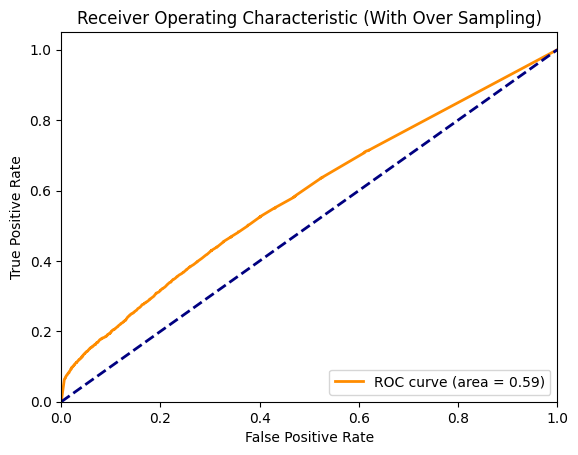

In [152]:
# Initialize and train RandomForest classifier on resampled data
classifier_rus_RF_o = RandomForestClassifier()
classifier_rus_RF_o.fit(X_resampled, y_resampled)

# Predict test set
y_pred_rus = classifier_rus_RF_o.predict(X_test)
y_proba_rus = classifier_rus_RF_o.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Over Sampling):")
print(classification_report(y_test, y_pred_rus))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Over Sampling):", roc_auc_score(y_test, y_proba_rus))

# Plotting ROC AUC Curve for resampled data
fpr_rus, tpr_rus, _ = roc_curve(y_test, y_proba_rus)
plt.figure()
plt.plot(fpr_rus, tpr_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_rus))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Over Sampling)')
plt.legend(loc="lower right")
plt.show()

Classification Report (With Over Sampling):
              precision    recall  f1-score   support

           0       0.94      0.63      0.75     60601
           1       0.09      0.47      0.16      4912

    accuracy                           0.62     65513
   macro avg       0.52      0.55      0.46     65513
weighted avg       0.87      0.62      0.71     65513

ROC AUC Score (With Over Sampling): 0.5704312216523663


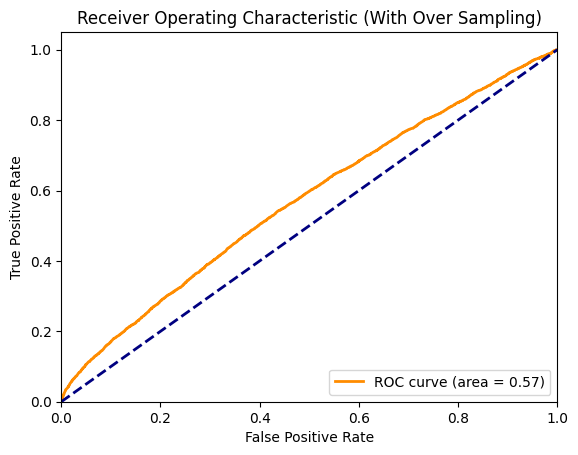

In [153]:
# Initialize and train XGBoost classifier on resampled data
classifier_rus_XG_o = XGBClassifier()
classifier_rus_XG_o.fit(X_resampled, y_resampled)

# Predict test set
y_pred_rus = classifier_rus_XG_o.predict(X_test)
y_proba_rus = classifier_rus_XG_o.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Over Sampling):")
print(classification_report(y_test, y_pred_rus))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Over Sampling):", roc_auc_score(y_test, y_proba_rus))

# Plotting ROC AUC Curve for resampled data
fpr_rus, tpr_rus, _ = roc_curve(y_test, y_proba_rus)
plt.figure()
plt.plot(fpr_rus, tpr_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_rus))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Over Sampling)')
plt.legend(loc="lower right")
plt.show()

#DOING SMOTE SAMPLING

In [154]:
from imblearn.over_sampling import SMOTE

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1_train, Y1_train, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)


Classification Report (With SMOTE Sampling):
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     60601
           1       0.13      0.23      0.16      4912

    accuracy                           0.83     65513
   macro avg       0.53      0.55      0.53     65513
weighted avg       0.87      0.83      0.85     65513

ROC AUC Score (With Over Sampling): 0.5882050062519797


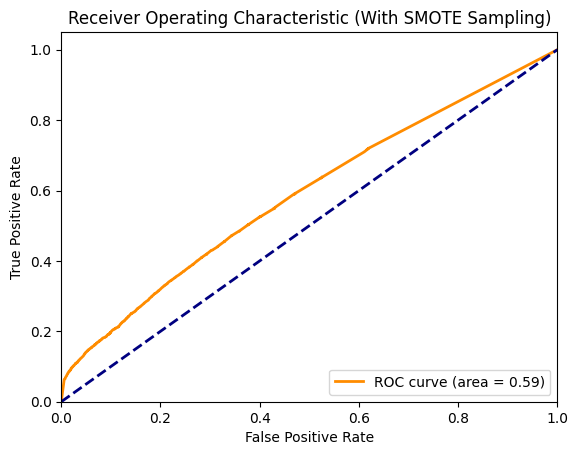

In [155]:
# Initialize and train RandomForest classifier on resampled data
classifier_rus_RF_smote = RandomForestClassifier()
classifier_rus_RF_smote.fit(X_resampled, y_resampled)

# Predict test set
y_pred_rus = classifier_rus_RF_smote.predict(X_test)
y_proba_rus = classifier_rus_RF_smote.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With SMOTE Sampling):")
print(classification_report(y_test, y_pred_rus))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Over Sampling):", roc_auc_score(y_test, y_proba_rus))

# Plotting ROC AUC Curve for resampled data
fpr_rus, tpr_rus, _ = roc_curve(y_test, y_proba_rus)
plt.figure()
plt.plot(fpr_rus, tpr_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_rus))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With SMOTE Sampling)')
plt.legend(loc="lower right")
plt.show()

Classification Report (With SMOTE Sampling):
              precision    recall  f1-score   support

           0       0.94      0.63      0.75     60601
           1       0.09      0.47      0.16      4912

    accuracy                           0.62     65513
   macro avg       0.52      0.55      0.46     65513
weighted avg       0.87      0.62      0.71     65513

ROC AUC Score (With SMOTE Sampling): 0.5704312216523663


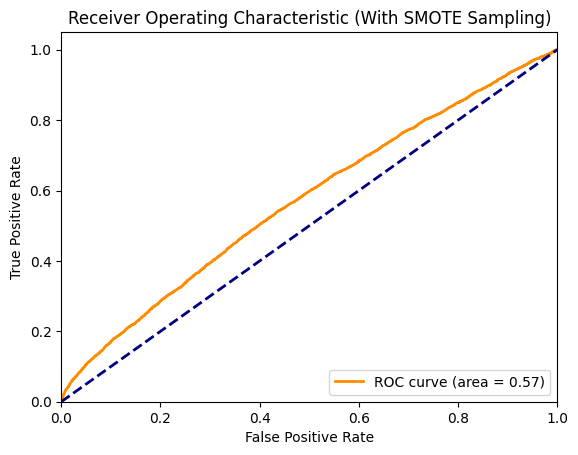

In [157]:
# Initialize and train XGBoost classifier on resampled data
classifier_rus_XG_smote = XGBClassifier()
classifier_rus_XG_smote.fit(X_resampled, y_resampled)

# Predict test set
y_pred_rus = classifier_rus_XG_smote.predict(X_test)
y_proba_rus = classifier_rus_XG_smote.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With SMOTE Sampling):")
print(classification_report(y_test, y_pred_rus))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With SMOTE Sampling):", roc_auc_score(y_test, y_proba_rus))

# Plotting ROC AUC Curve for resampled data
fpr_rus, tpr_rus, _ = roc_curve(y_test, y_proba_rus)
plt.figure()
plt.plot(fpr_rus, tpr_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_rus))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With SMOTE Sampling)')
plt.legend(loc="lower right")
plt.show()

#TESTING PART STARTS

In [158]:
test_path = "/content/drive/MyDrive/senior_ds_test/senior_ds_test/data/test/accounts_data_test.json"
with open(test_path, 'r') as file:
    data = json.load(file)

# Flatten the nested JSON structure
flat_data = [item for sublist in data for item in sublist]

# Convert to DataFrame
acnt_test = pd.DataFrame(flat_data)

In [159]:
# Load the JSON file
test_path = "/content/drive/MyDrive/senior_ds_test/senior_ds_test/data/test/enquiry_data_test.json"
with open(test_path, 'r') as file:
    data = json.load(file)

# Flatten the nested JSON structure
flat_data = [item for sublist in data for item in sublist]

# Convert to DataFrame
enqry_test = pd.DataFrame(flat_data)

In [160]:
Flag_test=pd.read_csv('/content/drive/MyDrive/senior_ds_test/senior_ds_test/data/test/test_flag.csv')

In [161]:
acnt_test['closed_date'] = acnt_test['closed_date'].fillna('2020-12-30')

In [162]:
# Creating New Column Named modified_str , which contains appended 0's
acnt_test['modified_str'] = acnt_test['payment_hist_string'].astype(str)

In [ ]:
# Modify the 'modified_str' column based on the conditions
for i in range(len(acnt_test)):
    str_len = len(str(acnt_test['payment_hist_string'][i]))
    if str_len % 3 != 0:
        num_zeros = 3 - (str_len % 3)  # Calculate number of zeros to append
        acnt_test['modified_str'][i] = ('0' * num_zeros) +(acnt_test['modified_str'][i])
    else:
        if str_len==0:
          acnt_test['modified_str'][i]='000'

acnt_test['open_date'] = pd.to_datetime(acnt_test['open_date'])
acnt_test['closed_date'] = pd.to_datetime(acnt_test['closed_date'])

acnt_test['months_diff'] = (acnt_test['closed_date'].dt.to_period('M').astype(int) - acnt_test['open_date'].dt.to_period('M').astype(int))

acnt_test.head()

In [ ]:
# Calculating Values of Various Due Days Features
#1. Total Months in which there is due
#2. Total Months in which Due is >=15 & <30 days
#3. Total Months in which Due is >=30 & <90 days
#4. Total Months in which Due is >=90 days
#5. Total Months in which there is Subsequent Due
#6. Max Subsequent due
#7. Max Recent Subsequent due
#8. Max days due
total_month_due_test={}
cnt_months_due_bw_15_30_test={}
cnt_months_due_bw_30_90_test={}
cnt_months_due_90_test={}
cnt_subsequent_due_test={}
max_subsequent_due_test={}
max_recent_subsequent_due_test={}
max_days_due_test={}
for j in range(len(acnt_test)):
  str_len=len(acnt_test['modified_str'][j])
  # Functions to calculate values for each rows
  total_month_due_test[j]=find_total_month_due(str_len,j,acnt_test)
  cnt_months_due_bw_15_30_test[j]=find_total_month_due_bw_15_30(str_len,j,acnt_test)
  cnt_months_due_bw_30_90_test[j]=find_total_month_due_bw_30_90(str_len,j,acnt_test)
  cnt_months_due_90_test[j]=find_total_month_due_90(str_len,j,acnt_test)
  cnt_subsequent_due_test[j]=find_total_subsequent_due(str_len,j,acnt_test)
  max_subsequent_due_test[j]=find_max_subsequent_due(str_len,j,acnt_test)
  max_recent_subsequent_due_test[j]=find_max_recent_subsequent_due(str_len,j,acnt_test)
  max_days_due_test[j]= find_max_days_due(str_len,j,acnt_test)


In [ ]:
Due_info_test = pd.DataFrame({
    'total_month_due': list(total_month_due_test.values()),
    'months_due_bw_15_30': list(cnt_months_due_bw_15_30_test.values()),
    'months_due_bw_30_90': list(cnt_months_due_bw_30_90_test.values()),
    'months_due_90': list(cnt_months_due_90_test.values()),
    'subsequent_due': list(cnt_subsequent_due_test.values()),
    'max_subsequent_due': list(max_subsequent_due_test.values()),
    'max_recent_subsequent_due': list(max_recent_subsequent_due_test.values()),
    'max_days_due': list(max_days_due_test.values())
})


In [164]:
# Load DataFrame from file
with open('/content/drive/MyDrive/senior_ds_test/senior_ds_test/data/Due_inf_test1.pkl', 'rb') as f:
    Due_info_test = pickle.load(f)

In [165]:
Due_info_test.head()

total_month_due  months_due_bw_15_30  months_due_bw_30_90  months_due_90  \
0                0                    0                    0              0   
1                0                    0                    0              0   
2                0                    0                    0              0   
3                0                    0                    0              0   
4               10                    1                    2              7   

   subsequent_due  max_subsequent_due  max_recent_subsequent_due  max_days_due  
0               0                   0                          0             0  
1               0                   0                          0             0  
2               0                   0                          0             0  
3               0                   0                          0             0  
4               9                   9                          9           285

In [166]:
acnt_test_concat=pd.concat([acnt_test,Due_info_test], axis=1)

In [167]:
merged_test = pd.merge(acnt_test_concat, enqry_test, left_on=['uid', 'credit_type'], right_on=['uid', 'enquiry_type'])

In [168]:
#Making New Column loan_category
merged_test['loan_category'] = merged_test['credit_type'].apply(categorize_loan)

In [169]:
merged_test.head()

credit_type  loan_amount  amount_overdue  open_date closed_date  \
0  Consumer credit     417600.0             0.0 2019-01-24  2020-10-27   
1  Consumer credit      88587.0             0.0 2015-05-14  2016-03-16   
2  Consumer credit      63049.5             0.0 2014-05-03  2015-10-27   
3  Consumer credit     711000.0             0.0 2018-01-05  2020-09-18   
4      Credit card     166500.0             0.0 2019-01-24  2020-12-30   

                                 payment_hist_string          uid  \
0  0000000000000000000000000000000180480781081381...  AAB68152393   
1                     000000000000000000000000000000  AAB68152393   
2  0000000000000000000000000000000000000000000000...  AAB68152393   
3  0000000000000000000000000000000000000000000000...  AAB68152393   
4  0000000000000000000000000000000000000000000000...  AAB68152393   

                                        modified_str  months_diff  \
0  0000000000000000000000000000000180480781081381...           21   
1                     000000000000000000000000000000           10   
2  0000000000000000000000000000000000000000000000...           17   
3  0000000000000000000000000000000000000000000000...           32   
4  0000000000000000000000000000000000000000000000...           23   

   total_month_due  ...  months_due_bw_30_90  months_due_90  subsequent_due  \
0                8  ...                    2              5               7   
1                0  ...                    0              0               0   
2                0  ...                    0              0               0   
3                0  ...                    0              0               0   
4                0  ...                    0              0               0   

   max_subsequent_due  max_recent_subsequent_due  max_days_due  \
0                   7                          7           228   
1                   0                          0             0   
2                   0                          0             0   
3                   0                          0             0   
4                   0                          0             0   

      enquiry_type enquiry_amt  enquiry_date    loan_category  
0  Consumer credit      120000    2018-05-04       Cash loans  
1  Consumer credit      120000    2018-05-04       Cash loans  
2  Consumer credit      120000    2018-05-04       Cash loans  
3  Consumer credit      120000    2018-05-04       Cash loans  
4      Credit card       59000    2020-11-19  Revolving loans  

[5 rows x 21 columns]

In [170]:
#Merging with Flag Dataset
merged_test_final = pd.merge(merged_test, Flag_test, left_on=['uid', 'loan_category'], right_on=['uid', 'NAME_CONTRACT_TYPE'])

In [171]:
merged_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58360 entries, 0 to 58359
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   credit_type                58360 non-null  object        
 1   loan_amount                58360 non-null  float64       
 2   amount_overdue             58360 non-null  float64       
 3   open_date                  58360 non-null  datetime64[ns]
 4   closed_date                58360 non-null  datetime64[ns]
 5   payment_hist_string        58360 non-null  object        
 6   uid                        58360 non-null  object        
 7   modified_str               58360 non-null  object        
 8   months_diff                58360 non-null  int64         
 9   total_month_due            58360 non-null  int64         
 10  months_due_bw_15_30        58360 non-null  int64         
 11  months_due_bw_30_90        58360 non-null  int64         
 12  mont

In [173]:
selected_columns_test = ['loan_amount','loan_category','amount_overdue','enquiry_amt','max_days_due','max_subsequent_due','months_due_bw_15_30','months_due_bw_30_90','uid']
test_data=merged_test_final[selected_columns_test]

In [174]:
test_data = pd.get_dummies(test_data, columns=['loan_category'],prefix='')
test_data['_Cash loans']=test_data['_Cash loans'].astype(int)
test_data['_Revolving loans']=test_data['_Revolving loans'].astype(int)
test_data.head()

loan_amount  amount_overdue  enquiry_amt  max_days_due  max_subsequent_due  \
0     417600.0             0.0       120000           228                   7   
1      88587.0             0.0       120000             0                   0   
2      63049.5             0.0       120000             0                   0   
3     711000.0             0.0       120000             0                   0   
4      64975.5             0.0        27000             0                   0   

   months_due_bw_15_30  months_due_bw_30_90          uid  _Cash loans  \
0                    1                    2  AAB68152393            1   
1                    0                    0  AAB68152393            1   
2                    0                    0  AAB68152393            1   
3                    0                    0  AAB68152393            1   
4                    0                    0  AAE38809797            1   

   _Revolving loans  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [176]:
X1_test = test_data.drop('uid', axis=1)
Y1_test = test_data['uid']

#Doing Prediction ON SMOTE XGBOOST Classifier

In [178]:
y_proba_rus_test = classifier_rus_XG_smote.predict_proba(X1_test)[:, 1]

In [180]:
y_proba_rus_test=pd.DataFrame(y_proba_rus_test)

In [184]:
y_proba_rus_test.head(10)

0
0  0.306105
1  0.453860
2  0.525521
3  0.530963
4  0.393478
5  0.370058
6  0.424421
7  0.049945
8  0.489510
9  0.370058

#Doing Prediction on Random Forest Classifier on SMOTE Technique

In [185]:
y_proba_rus_test_rf = classifier_rus_RF_smote.predict_proba(X_test)[:, 1]

In [186]:
y_proba_rus_test_rf=pd.DataFrame(y_proba_rus_test_rf)

In [190]:
y_proba_rus_test_rf.head(10)

0
0  0.000000
1  0.007179
2  0.006429
3  1.000000
4  0.000000
5  0.030000
6  0.000000
7  0.039060
8  0.010000
9  0.010000

In [191]:
final_output=pd.concat([Y1_test,y_proba_rus_test],axis=1)

In [192]:
final_output.head()

uid         0
0  AAB68152393  0.306105
1  AAB68152393  0.453860
2  AAB68152393  0.525521
3  AAB68152393  0.530963
4  AAE38809797  0.393478

In [194]:
file_path = '/content/drive/MyDrive/senior_ds_test/senior_ds_test/Dev_Nan.csv'

# Save the DataFrame to CSV
final_output.to_csv(file_path, index=False)